![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [70]:
# Start your code here!
import pandas as pd
#import the data
women_data = pd.read_csv('women_results.csv')
women_df = pd.DataFrame(women_data)
men_data = pd.read_csv('men_results.csv')
men_df = pd.DataFrame(men_data)
women_data.info()
men_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4884 non-null   int64 
 1   date        4884 non-null   object
 2   home_team   4884 non-null   object
 3   away_team   4884 non-null   object
 4   home_score  4884 non-null   int64 
 5   away_score  4884 non-null   int64 
 6   tournament  4884 non-null   object
dtypes: int64(3), object(4)
memory usage: 267.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44353 entries, 0 to 44352
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  44353 non-null  int64 
 1   date        44353 non-null  object
 2   home_team   44353 non-null  object
 3   away_team   44353 non-null  object
 4   home_score  44353 non-null  int64 
 5   away_score  44353 non-null  int64 
 6   tournament  44353 non-null  object
dtypes: int64(

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4884 non-null   int64 
 1   date        4884 non-null   object
 2   home_team   4884 non-null   object
 3   away_team   4884 non-null   object
 4   home_score  4884 non-null   int64 
 5   away_score  4884 non-null   int64 
 6   tournament  4884 non-null   object
dtypes: int64(3), object(4)
memory usage: 267.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44353 entries, 0 to 44352
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  44353 non-null  int64 
 1   date        44353 non-null  object
 2   home_team   44353 non-null  object
 3   away_team   44353 non-null  object
 4   home_score  44353 non-null  int64 
 5   away_score  44353 non-null  int64 
 6   tournament  44353 non-null  object
dtypes: int64(

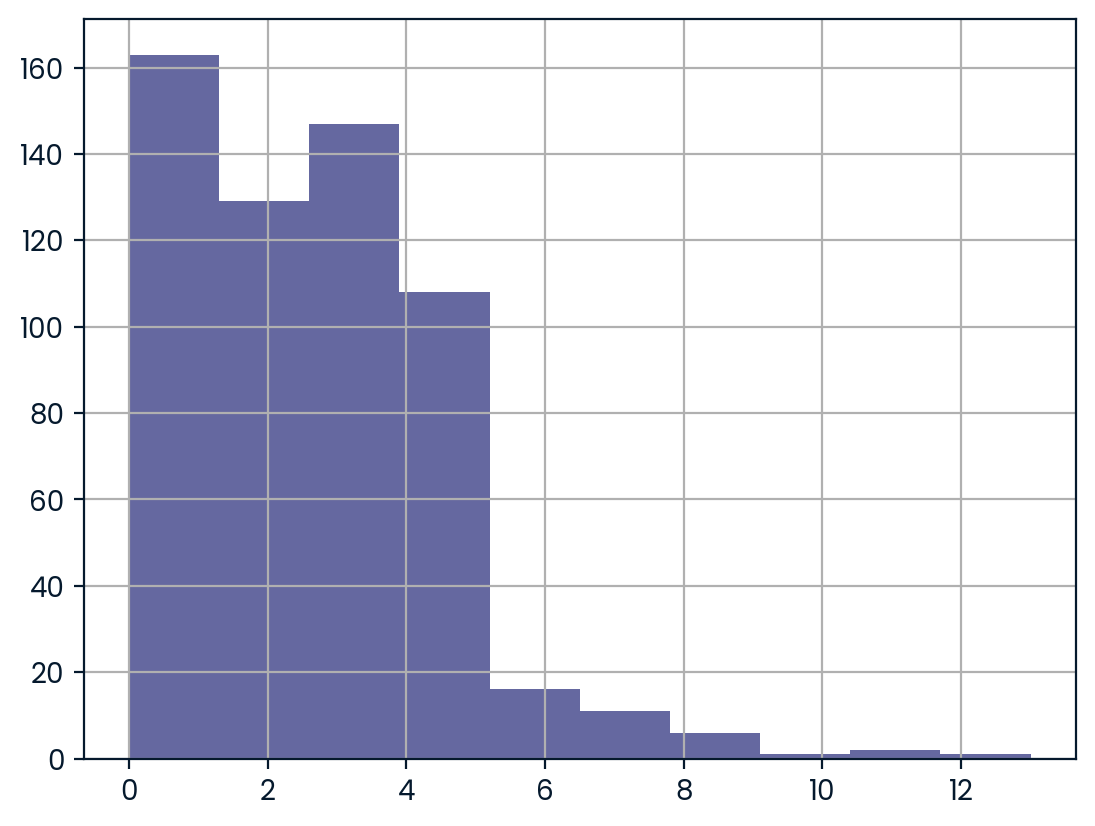

       U-val alternative     p-val       RBC      CLES
MWU  43273.0     greater  0.005107 -0.126901  0.563451
0.005106609825443641
{'p_val': 0.005106609825443641, 'result': 'reject'}


In [71]:
import pandas as pd
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt
import pingouin

#import the data into a dataframe
women_data = pd.read_csv('women_results.csv')
women_df = pd.DataFrame(women_data)
men_data = pd.read_csv('men_results.csv')
men_df = pd.DataFrame(men_data)
women_data.info()
men_data.info()
print(men_df['date'].value_counts())
print(men_df['tournament'].value_counts())

#creating a function that filters the dataframes based on the given conditions
def filter_df(df):
    df['date'] = pd.to_datetime(df['date'])
    df_filtered = df[(df['date'] >= '2002-01-01') & (df['tournament'] == 'FIFA World Cup')]
    return df_filtered

#using the function to filter the men and women_result's dataframe
men_df_filtered = filter_df(men_df)
men_df_filtered['gender'] = 'Men'
#men_df_filtered.head()
women_df_filtered = filter_df(women_df)
women_df_filtered['gender'] = 'Women'
#women_df_filtered.head()

# concatenate the data on the axis 
Fifa_cup_2022 = pd.concat([women_df_filtered, men_df_filtered], ignore_index=True)
#Fifa_cup_2022.head()

#hypothesis testing 
alpha = 0.01
# lets check if the data is normally distributed
#To get the total goals, we have to add home and away scores together
Fifa_cup_2022['goals'] = Fifa_cup_2022['home_score'] + Fifa_cup_2022['away_score']
Fifa_cup_2022.head()

# lets check if the data is normally distributed
Fifa_cup_2022['goals'].hist()
plt.show()

#Since the distribution of the data is not normal, we'd be using a non parametric test
#Filter the dataframe for the goals of men and women separately
both_subset = Fifa_cup_2022[["goals", "gender"]]
both_subset_wide = both_subset.pivot(columns="gender", values="goals")

#perform an hypothesis test using mannwhitneyu
result_hyp = pingouin.mwu(x=both_subset_wide['Women'], y=both_subset_wide['Men'], alternative='greater')
print(result_hyp)
p_value = result_hyp['p-val'].values[0]
print(p_value)

#determine the result of the hypothesis test
if p_value <= 0.01:
    result = 'reject'
else:
    result = 'fail to reject'
    
#store the pvalue and result in a dictionary
result_dict = {'p_val': p_value, 'result': result}
print(result_dict)